In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/NFLPlaybyPlay.csv")
df.head()

C:\Users\ttank\AppData\Local\Temp\ipykernel_26468\1328012104.py:2: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/NFLPlaybyPlay.csv")


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,NaN,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,NaN,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,NaN,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [32]:
df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000,361724.000000,361724.000000,362447.000000,...,141713.000000,340504.000000,340504.000000,339087.000000,339087.000000,340454.000000,357630.000000,141709.000000,141491.000000,362447.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,...,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,...,1.972964,0.286415,0.286468,0.288647,0.288694,0.288207,0.045326,0.056422,0.067972,2.290084
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.964562,0.323129,0.230595,0.319464,0.226867,0.274964,-0.014589,-0.011355,-0.018623,2011.000000
50%,2.013091e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531286,0.469040,0.533689,0.466617,0.504349,0.000000,0.003557,0.000000,2013.000000
75%,2.015091e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.484913,0.770011,0.677566,0.773729,0.681018,0.726995,0.014800,0.035702,0.011371,2015.000000
max,2.017010e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2016.000000


In [4]:
df.isna().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

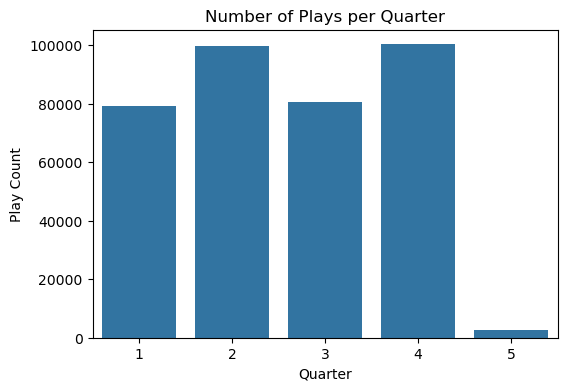

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='qtr', data=df)
plt.title("Number of Plays per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Play Count")
plt.show()


In [4]:
games = (df.groupby(['GameID', 'posteam','Date', 'Season'], as_index=False).sum())
games.head()

,GameID,posteam,Date,Season,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
0,2009091000,PIT,2009-09-10,2009,1270,245,167.0,15:0014:5314:1613:3513:2711:2410:4810:2109:430...,693,135177.0,2045.0,TENPITPITPITPITTENTENTENTENTENTENPITPITPITPITP...,2845.0,4653.0,676,1808,0.0,23.0,TENTENTENTENTENTENTENTENTENTENTENTENTENTENTENT...,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,88,476,4,1,Made,0,0,0,0,CleanCleanCleanCleanCleanCleanClean,KickoffPassRunPassPuntPassPassRunPassSackPuntR...,B.RoethlisbergerB.RoethlisbergerB.Roethlisberg...,00-002292400-002292400-002292400-002292400-002...,45,CompleteIncomplete PassCompleteCompleteComplet...,ShortDeepShortShortShortDeepShortShortShortDee...,402,115,7,leftrightrightleftrightrightleftrightleftleftr...,2,V.FullerC.Finnegan,W.ParkerW.ParkerR.MendenhallR.MendenhallW.Park...,00-002225000-002225000-002616300-002616300-002...,23,rightrightmiddlemiddlerightrightrightrightrigh...,endguardendendguardtackleguardguardtackleendta...,H.WardM.WallaceM.WallaceS.HolmesH.MillerH.Mill...,00-001716200-002690100-002690100-002424000-002...,34,Fair Catch,S.LoganC.FinneganC.FinneganS.LoganC.FinneganC....,0,M.GriffinC.HopeS.TullochW.HayesM.GriffinJ.Jone...,S.TullochK.VickersonJ.HayeC.FinneganJ.KearseS....,GoodGood,65.0,2,TEN,S.Tulloch,4,0,0,5,PITPITPITTENPIT,Illegal FormationEncroachmentDelay of Game,H.WardM.StarksM.WallaceK.Vanden BoschB.Roethli...,35,422.0,461.0,-39.0,51.0,PITPITPITPITPITPITPITPITPITPITPITPITPITPITPITP...,TENTENTENTENTENTENTENTENTENTENTENTENTENTENTENT...,0,0,234,234,245,234,245,13.649951,9.042120,0.216976,13.189850,23.725810,0.250976,26.924317,0.990795,0.0,141.251129,-4.716598,23.793724,-12.322201,48.309486,39.690514,47.664720,39.335280,48.309486,0.310761,-0.242881,0.948019
1,2009091000,TEN,2009-09-10,2009,986,189,148.0,13:1612:4012:1111:3408:2007:5707:2406:5706:520...,560,138463.0,1637.0,TENTENTENTENTENPITPITPITPITPITTENTENTENTENTENP...,2056.0,4416.0,651,1876,0.0,24.0,PITPITPITPITPITPITPITPITPITPITPITPITPITPITPITP...,(13:16) C.Johnson up the middle to TEN 2 for n...,77,425,3,1,Made,0,0,0,0,CleanCleanCleanCleanClean,RunPassRunPuntRunPassRunPassPassField GoalPass...,K.CollinsK.CollinsK.CollinsK.CollinsK.CollinsK...,00-000329200-000329200-000329200-000329200-000...,38,CompleteCompleteIncomplete PassIncomplete Pass...,ShortDeepShortShortShortDeepShortShortShortDee...,300,88,3,leftleftrightrightleftrightleftrightmiddleleft...,1,T.Polamalu,C.JohnsonC.JohnsonC.JohnsonC.JohnsonL.WhiteC.J...,00-002616400-002616400-002616400-002616400-002...,25,middleleftrightleftrightmiddleleftmiddleleftri...,endendendguardtackletackleguardguardguardguard...,A.HallB.ScaifeA.CrumplerB.ScaifeB.ScaifeJ.Gage...,00-002448900-002361200-002028500-002361200-002...,24,Fair CatchFair Catch,S.LoganS.LoganJ.RingerJ.RingerS.LoganJ.Ringer,0,B.KeiselT.PolamaluT.PolamaluM.GriffinT.Polamal...,J.FarriorC.HamptonA.SmithK.FoxC.HokeW.GayA.Har...,No

In [5]:
games_df = (df.groupby(['GameID', 'posteam'], as_index=False)
              .agg({
                  
                  'InterceptionThrown': 'sum',
                  'Fumble': 'sum',
                  'Touchdown': 'sum',
                  'FieldGoalResult': lambda x: (x == 'Good').sum(),
                  'Penalty.Yards': 'sum',
                  'Yards.Gained': 'mean',
                  'ReturnResult': lambda x: (x == 'Touchdown').sum(),
                  'Sack': 'sum',
                  'PosTeamScore': 'max',
                  'DefTeamScore': 'max',
                  'Season': 'first'
                  
                  
              }))
yards = (df.groupby(['GameID', 'posteam',], as_index=False)
              .agg({
                  'Yards.Gained': 'sum',
              }))
games_df['Yards.Gained'] = yards['Yards.Gained']
games_df['win'] = (games_df['PosTeamScore'] > games_df['DefTeamScore']).astype(int)

games_df.head(100)

season_games = games_df.groupby(['posteam', 'Season'], as_index=False).size()
season_games['total_wins'] = games_df.groupby(['posteam', 'Season'])['win'].transform('sum')
season_games.head(20)
  

,posteam,Season,size,total_wins
0,ARI,2009,16,7
1,ARI,2010,16,7
2,ARI,2011,16,9
3,ARI,2012,16,6
4,ARI,2013,16,8
5,ARI,2014,16,3
6,ARI,2015,16,8
7,ARI,2016,16,10
8,ATL,2009,16,9
9,ATL,2010,16,7


In [30]:
games_df.head()
games = games_df[['GameID', 'posteam','win', 'Season']]
games.head()

,GameID,posteam,win,Season
0,2009091000,PIT,0,2009
1,2009091000,TEN,0,2009
2,2009091300,ATL,1,2009
3,2009091300,MIA,0,2009
4,2009091301,BAL,1,2009


In [44]:
teamA = games.groupby("GameID").nth(0).reset_index()
teamB = games.groupby("GameID").nth(1).reset_index()


matchups = teamA.merge(
    teamB,
    on="GameID",
    suffixes=('_A', '_B')
)
matchups2009 = matchups[matchups['Season_A'] == 2009]
matchups2009.head(50)


,index_A,GameID,posteam_A,win_A,Season_A,index_B,posteam_B,win_B,Season_B
0,0,2009091000,PIT,0,2009,1,TEN,0,2009
1,2,2009091300,ATL,1,2009,3,MIA,0,2009
2,4,2009091301,BAL,1,2009,5,KC,0,2009
3,6,2009091302,CAR,0,2009,7,PHI,1,2009
4,8,2009091303,CIN,0,2009,9,DEN,1,2009
5,10,2009091304,CLE,0,2009,11,MIN,1,2009
6,12,2009091305,HOU,0,2009,13,NYJ,1,2009
7,14,2009091306,IND,1,2009,15,JAC,0,2009
8,16,2009091307,DET,0,2009,17,NO,1,2009
9,18,2009091308,DAL,1,2009,19,TB,0,2009


In [37]:
teamA.head()

,index,GameID,posteam,win,Season
0,0,2009091000,PIT,0,2009
1,2,2009091300,ATL,1,2009
2,4,2009091301,BAL,1,2009
3,6,2009091302,CAR,0,2009
4,8,2009091303,CIN,0,2009


In [38]:
teamB.head()

,index,GameID,posteam,win,Season
0,1,2009091000,TEN,0,2009
1,3,2009091300,MIA,0,2009
2,5,2009091301,KC,0,2009
3,7,2009091302,PHI,1,2009
4,9,2009091303,DEN,1,2009


In [ ]:
games_averages = games_df.groupby(['posteam', 'Season'], as_index=False).mean()
games_averages = games_averages.drop(columns=['GameID'])
games_averages = games_averages.sort_values(by=['win'], ascending=False)
games_averages.head(20)
games_averages2009 = games_averages[games_averages['Season'] == 2009]
games_averages2009.head(20)


,posteam,Season,InterceptionThrown,Fumble,Touchdown,FieldGoalResult,Penalty.Yards,Yards.Gained,ReturnResult,Sack,PosTeamScore,DefTeamScore,win
154,NO,2009,0.8125,1.5625,3.8750,1.3750,48.0000,523.9375,0.3125,1.3750,29.5625,21.1875,0.8125
104,IND,2009,1.2500,0.7500,3.2500,1.0000,50.5000,466.0000,0.1250,0.8750,25.6875,19.0625,0.8125
88,GB,2009,0.5000,1.4375,3.3125,1.6875,61.1875,499.8750,0.1250,3.3750,28.6250,18.0000,0.7500
0,ARI,2009,1.3125,1.8750,2.9375,1.1250,56.5000,475.1875,0.2500,1.6250,22.8750,20.0625,0.6875
138,MIN,2009,0.5000,0.9375,3.7500,1.6250,51.1875,488.1875,0.3750,2.1875,29.3125,18.4375,0.6875
202,SD,2009,0.6250,0.8125,3.0000,2.0000,41.9375,472.2500,0.1250,1.6250,27.2500,20.3125,0.6875
64,DAL,2009,0.5625,1.2500,2.7500,1.2500,51.6875,502.2500,0.1250,2.1875,21.6875,15.3125,0.6875
146,NE,2009,0.8125,1.0000,3.1875,1.6250,55.1875,500.5000,0.2500,1.1250,26.3125,17.0625,0.6250
186,PHI,2009,0.8750,1.4375,2.6250,2.0000,44.8750,466.5000,0.0625,2.6875,26.0625,20.5625,0.6250
170,NYJ,2009,1.3750,1.4375,2.5625,1.8750,43.3125,410.8125,0.3750,1.8750,21.6250,13.6875,0.6250


In [47]:
# Merge Team A season averages
matchups2009a = matchups2009.copy()
matchups2009a = matchups2009a.merge(
    games_averages2009,
    left_on="posteam_A",
    right_on="posteam",
    suffixes=("", "_A")
).drop(columns=["posteam", "Season"])


# Merge Team B season averages
matchups2009a = matchups2009a.merge(
    games_averages2009,
    left_on="posteam_B",
    right_on="posteam",
    suffixes=("", "_B")
)
matchups2009a.head(20)


,index_A,GameID,posteam_A,win_A,Season_A,index_B,posteam_B,win_B,Season_B,InterceptionThrown,Fumble,Touchdown,FieldGoalResult,Penalty.Yards,Yards.Gained,ReturnResult,Sack,PosTeamScore,DefTeamScore,win,posteam,Season,InterceptionThrown_B,Fumble_B,Touchdown_B,FieldGoalResult_B,Penalty.Yards_B,Yards.Gained_B,ReturnResult_B,Sack_B,PosTeamScore_B,DefTeamScore_B,win_B
0,0,2009091000,PIT,0,2009,1,TEN,0,2009,1.1250,1.3125,2.6250,1.6875,52.1875,502.3125,0.1875,3.4375,22.5625,19.3125,0.4375,TEN,2009,0.9375,1.3750,2.2500,1.6875,34.3125,467.9375,0.0000,0.8750,21.1875,24.9375,0.4375
1,2,2009091300,ATL,1,2009,3,MIA,0,2009,1.1250,1.5000,2.9375,1.1875,48.8125,454.5000,0.1875,1.8750,21.7500,19.9375,0.5625,MIA,2009,1.2500,1.5625,2.6875,1.5625,35.6250,468.1250,0.3750,2.1875,21.5000,24.1875,0.3750
2,4,2009091301,BAL,1,2009,5,KC,0,2009,0.8125,1.2500,2.9375,1.3750,52.5625,480.6875,0.1875,2.5625,24.0000,16.1875,0.5000,KC,2009,1.1250,1.6875,1.8750,1.5625,52.6250,445.7500,0.2500,2.8750,17.7500,25.5625,0.1875
3,6,2009091302,CAR,0,2009,7,PHI,1,2009,1.3125,1.3125,2.6250,1.3750,36.0625,444.7500,0.3750,2.1250,19.5625,18.4375,0.5000,PHI,2009,0.8750,1.4375,2.6250,2.0000,44.8750,466.5000,0.0625,2.6875,26.0625,20.5625,0.6250
4,8,2009091303,CIN,0,2009,9,DEN,1,2009,0.8125,1.6250,2.1250,1.5000,61.0625,434.7500,0.1875,1.9375,18.6250,18.0625,0.5625,DEN,2009,0.8125,0.9375,2.2500,1.8750,52.3750,452.8750,0.3125,2.1875,19.6250,20.0000,0.4375
5,10,2009091304,CLE,0,2009,11,MIN,1,2009,1.1250,1.3750,1.8125,1.4375,38.7500,381.9375,0.4375,2.0000,14.5625,22.1875,0.3750,MIN,2009,0.5000,0.9375,3.7500,1.6250,51.1875,488.1875,0.3750,2.1875,29.3125,18.4375,0.6875
6,12,2009091305,HOU,0,2009,13,NYJ,1,2009,1.0625,1.3125,2.8750,1.3125,31.9375,486.5625,0.2500,1.6875,23.6875,20.6250,0.5625,NYJ,2009,1.3750,1.4375,2.5625,1.8750,43.3125,410.8125,0.3750,1.8750,21.6250,13.6875,0.6250
7,14,2009091306,IND,1,2009,15,JAC,0,2009,1.2500,0.7500,3.2500,1.0000,50.5000,466.0000,0.1250,0.8750,25.6875,19.0625,0.8125,JAC,2009,0.6250,1.5000,2.3750,1.1250,35.3125,458.6250,0.1250,2.8125,18.0625,22.8125,0.3750
8,16,2009091307,DET,0,2009,17,NO,1,2009,2.1250,1.3750,1.7500,1.3750,57.4375,464.9375,0.1875,2.6875,15.8125,31.1875,0.0625,NO,2009,0.8125,1.5625,3.8750,1.3750,48.0000,523.9375,0.3125,1.3750,29.5625,21.1875,0.8125
9,18,2009091308,DAL,1,2009,19,TB,0,2009,0.5625,1.2500,2.7500,1.2500,51.6875,502.2500,0.1250,2.1875,21.6875,15.3125,0.6875,TB,2009,1.8750,1.5625,1.7500,1.0000,49.3125,419.5625,0.1875,2.1875,14.3750,24.7500,0.1250


In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix
X = matchups2009a.drop(columns=['posteam_A', 'posteam_B', 'Season', 'Season_A', 'Season_B', 'index_A', 'index_B','win_B','win_A', 'posteam','GameID'])
y = matchups2009a['win_A']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
tree = DecisionTreeClassifier(max_depth=9, random_state=42)
tree.fit(X_train, y_train)

# Predict
y_pred = tree.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.6153846153846154
Confusion Matrix:
 [[13  6]
 [14 19]]


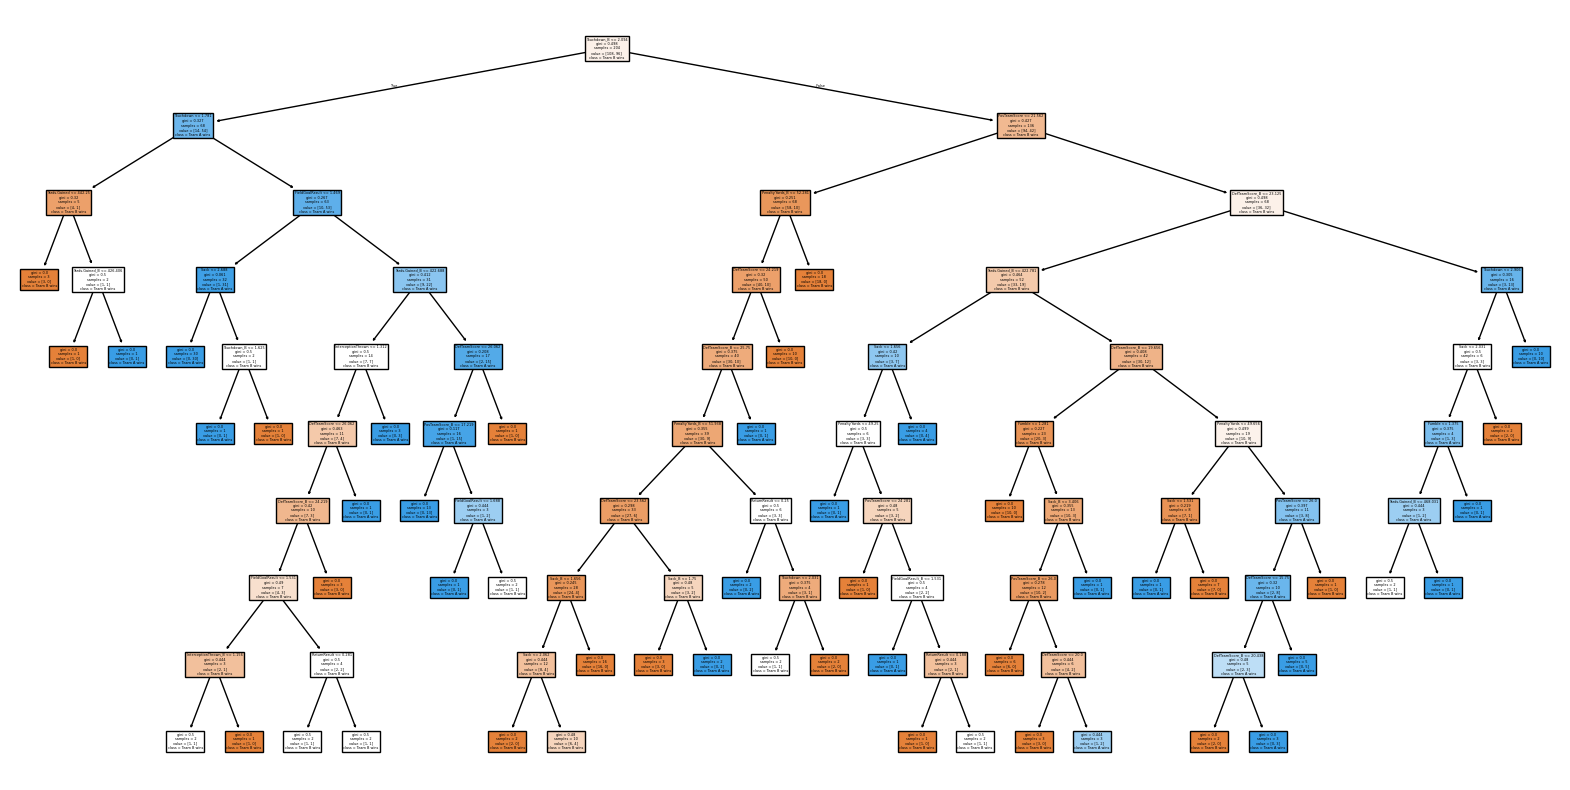

In [70]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, class_names=['Team B wins', 'Team A wins'], filled=True)
plt.show()

In [24]:
matchups = matchups.merge(games_averages.add_suffix("_1"), left_on="posteam_A", right_on="posteam_B")
matchups = matchups.merge(games_averages.add_suffix("_2"), left_on="posteam_B", right_on="posteam_B")

KeyError: 'posteam_B'

In [17]:
matchups = games_averages.merge(
    games_averages,
    on='Season',
    suffixes=('_A', '_B')
)
matchups = matchups[matchups['posteam_A'] != matchups['posteam_B']]
matchups2012 = matchups[matchups['Season'] == 2012]
matchups2012.head(32)


,posteam_A,Season,InterceptionThrown_A,Fumble_A,Touchdown_A,FieldGoalResult_A,Penalty.Yards_A,Yards.Gained_A,ReturnResult_A,Sack_A,PosTeamScore_A,DefTeamScore_A,win_A,posteam_B,InterceptionThrown_B,Fumble_B,Touchdown_B,FieldGoalResult_B,Penalty.Yards_B,Yards.Gained_B,ReturnResult_B,Sack_B,PosTeamScore_B,DefTeamScore_B,win_B
1,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,TEN,1.0625,1.2500,2.1875,1.5625,48.1250,449.0000,0.5000,2.5625,19.2500,28.6875,0.2500
2,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,TB,1.1250,0.8125,2.7500,1.7500,47.1875,448.4375,0.1875,1.5625,23.6250,23.5625,0.5000
3,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,STL,0.8750,1.5000,1.9375,1.4375,53.6875,426.1875,0.1875,2.2500,17.6875,21.5625,0.3750
4,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,SF,0.5000,1.3750,2.8125,1.8750,51.1250,486.3750,0.1875,2.6250,24.8750,15.8125,0.7500
5,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,SEA,0.6875,1.0000,3.1250,1.5000,66.1250,424.0625,0.2500,2.3125,24.2500,15.7500,0.6250
6,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,SD,0.9375,1.3125,2.2500,1.6250,53.2500,395.1875,0.3125,3.0625,20.7500,21.4375,0.4375
7,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,PIT,0.8750,2.0000,2.6250,1.7500,53.1875,442.1875,0.3750,2.5625,19.9375,18.4375,0.3125
8,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,PHI,1.0000,2.3125,2.2500,1.6875,57.0000,478.8125,0.5000,3.0625,17.0000,26.1250,0.2500
9,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,OAK,1.0625,1.4375,1.9375,1.9375,60.1250,460.6875,0.1250,1.8125,17.4375,27.1875,0.1875
10,WAS,2012,0.5625,1.4375,3.0625,1.5000,60.625,477.9375,0.1875,2.1875,26.5625,24.1875,0.50,NYJ,1.2500,2.0625,2.1875,1.3125,38.7500,405.1875,0.4375,3.0625,17.4375,22.6875,0.3125


In [ ]:
df = matchups.copy()

# Drop ID and non-numeric fields
X = df.drop(columns=['posteam_A', 'posteam_B', 'win_A', 'win_B'])

y = df['win_A']  


In [ ]:
matchups['yards_diff'] = matchups['Yards.Gained_A'] - matchups['Yards.Gained_B']
matchups['PointsAVG_diff'] = matchups['Sack_A'] - matchups['Sack_B']
matchups['down_diff'] = matchups['down_A'] - matchups['down_B']
matchups['timeunder_diff'] = matchups['timeunder_A'] - matchups['timeunder_B']
matchups['points_diff'] = matchups['total_points_A'] - matchups['total_points_B']
matchups['win_diff'] = matchups['wins_A'] - matchups['wins_B']


C:\Users\ttank\AppData\Local\Temp\ipykernel_46528\932916650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sacks_win, x='Sack', y='win', palette='viridis')


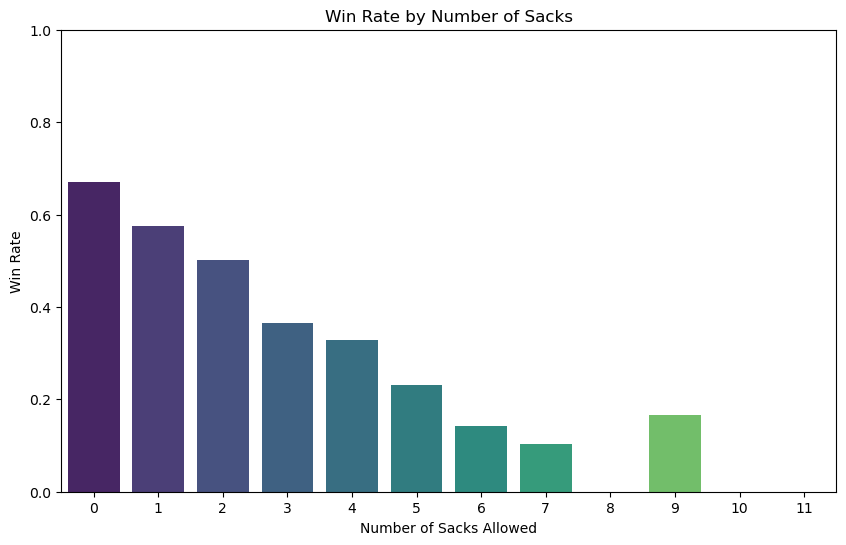

In [50]:
sacks_win = games_df.groupby('Sack', as_index=False)['win'].mean()  # mean gives win rate

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=sacks_win, x='Sack', y='win', palette='viridis')
plt.xlabel('Number of Sacks Allowed')
plt.ylabel('Win Rate')
plt.title('Win Rate by Number of Sacks')
plt.ylim(0,1)
plt.show()

C:\Users\ttank\AppData\Local\Temp\ipykernel_46528\1449806415.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sacks_win, x='Safety', y='win', palette='viridis')


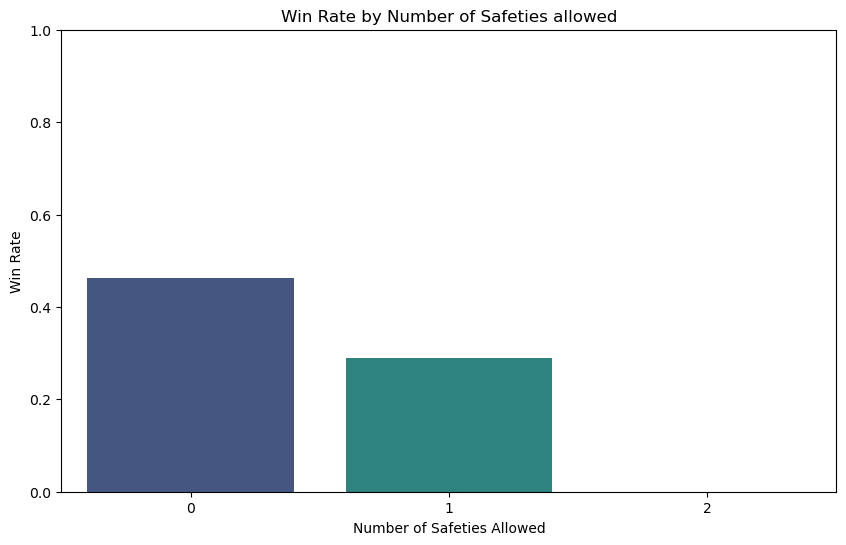

In [8]:
sacks_win = games_df.groupby('Safety', as_index=False)['win'].mean()  # mean gives win rate

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=sacks_win, x='Safety', y='win', palette='viridis')
plt.xlabel('Number of Safeties Allowed')
plt.ylabel('Win Rate')
plt.title('Win Rate by Number of Safeties allowed')
plt.ylim(0,1)
plt.show()

C:\Users\ttank\AppData\Local\Temp\ipykernel_46528\3677807379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=touchdown_win, x='Touchdown', y='win', palette='viridis')


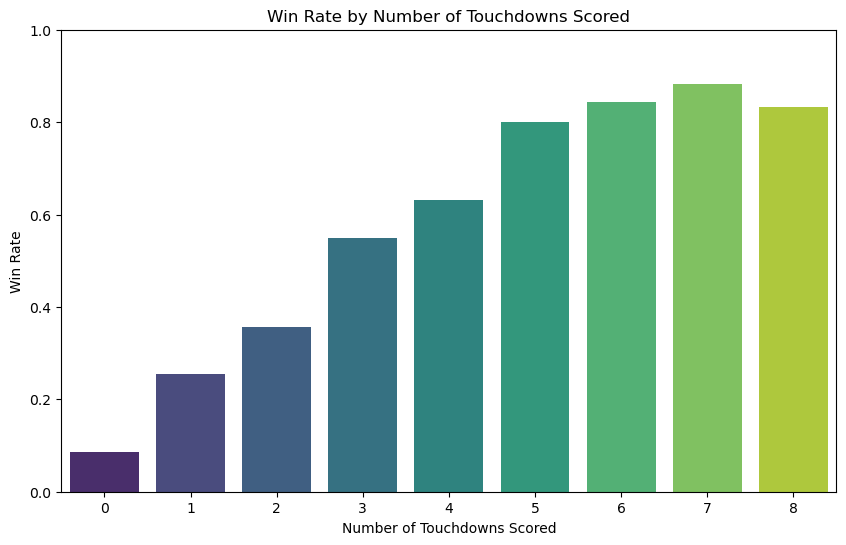

In [10]:
touchdown_win = games_df.groupby('Touchdown', as_index=False)['win'].mean()  # mean gives win rate

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=touchdown_win, x='Touchdown', y='win', palette='viridis')
plt.xlabel('Number of Touchdowns Scored')
plt.ylabel('Win Rate')
plt.title('Win Rate by Number of Touchdowns Scored')
plt.ylim(0,1)
plt.show()

In [8]:
games_df.to_csv("../data/nfl_cleaned.csv", index=False)
print("✅ Cleaned data saved to data/nfl_cleaned.csv")

✅ Cleaned data saved to data/nfl_cleaned.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load cleaned data
df = pd.read_csv("../data/nfl_cleaned.csv")

# Feature setup
df['target'] = (df['win'] > 0).astype(int)
df = pd.get_dummies(df, columns=['posteam'], drop_first=True)

X = df.drop(columns=['target', 'win', 'PosTeamScore', 'DefTeamScore', 'GameID'])
y = df['target']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)
model2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model2.fit(X_train, y_train)

# Evaluate
acc = accuracy_score(y_test, model.predict(X_test))
print(f"Model Accuracy: {acc:.3f}")
acc = accuracy_score(y_test, model2.predict(X_test))
print(f"Model2 Accuracy: {acc:.3f}")



Model Accuracy: 0.717
Model2 Accuracy: 0.763


In [24]:
for x in range(2,20):
    model = DecisionTreeClassifier(max_depth=x, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Model Depth {x} Accuracy: {acc:.3f}")


Model Depth 2 Accuracy: 0.690
Model Depth 3 Accuracy: 0.717
Model Depth 4 Accuracy: 0.748
Model Depth 5 Accuracy: 0.763
Model Depth 6 Accuracy: 0.765
Model Depth 7 Accuracy: 0.756
Model Depth 8 Accuracy: 0.750
Model Depth 9 Accuracy: 0.746
Model Depth 10 Accuracy: 0.748
Model Depth 11 Accuracy: 0.723
Model Depth 12 Accuracy: 0.728
Model Depth 13 Accuracy: 0.720
Model Depth 14 Accuracy: 0.728
Model Depth 15 Accuracy: 0.722
Model Depth 16 Accuracy: 0.717
Model Depth 17 Accuracy: 0.718
Model Depth 18 Accuracy: 0.722
Model Depth 19 Accuracy: 0.715


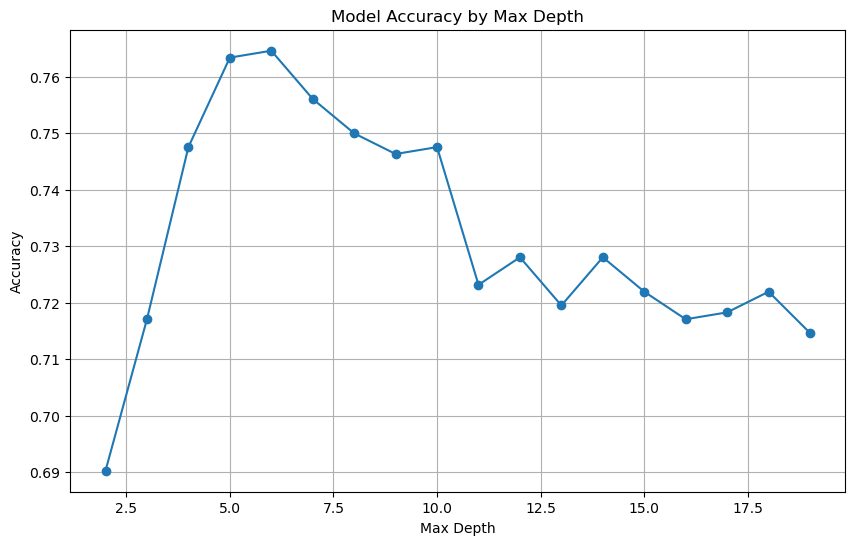

In [25]:
plt.figure(figsize=(10,6))
depths = list(range(2,20))
accuracies = []
for x in depths:
    model = DecisionTreeClassifier(max_depth=x, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(acc)
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Max Depth')
plt.grid(True)
plt.show()

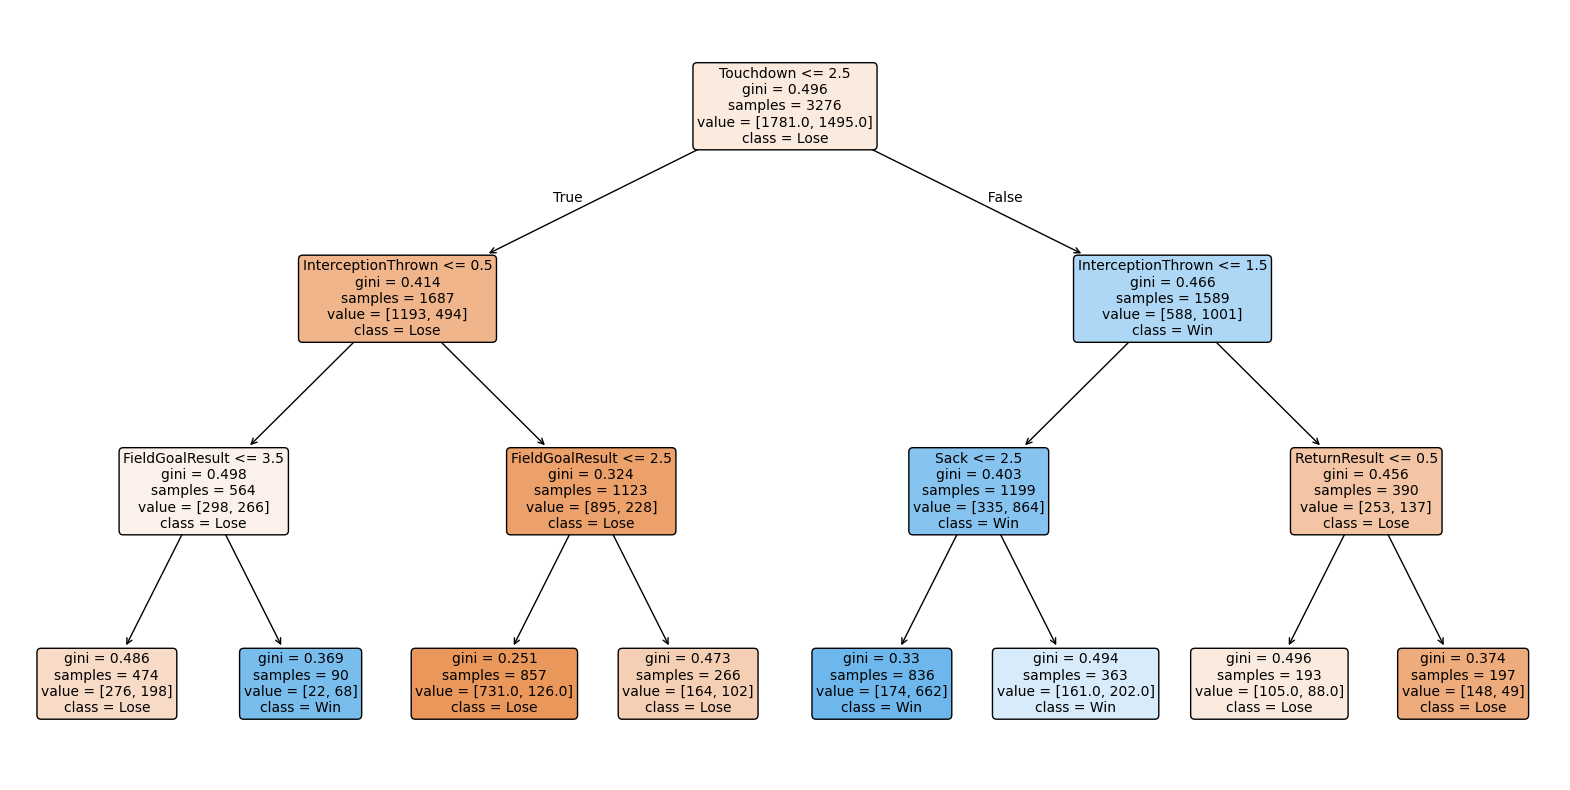

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Adjust the size as needed
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Lose', 'Win'],
    filled=True,             # Colors nodes by class
    rounded=True,
    fontsize=10
)
plt.show()
